### Step 1a: Planning 

'''
I will be using the data file named 'song-starts-with-a.csv'. this file contains data of songs that start with the letter a. the data the file contains is the title of the songs, the artist(s) by whom the song is written, the year in which it was released, the song's popularity represented as a float in range 0-1, the duration of the song represented as a float measured in seconds, and the tempo of the song represented as a float measured in bpm (beats per minute). this data is expressed in the following form:

Title, Artist, Year, Popularity, Duration, Tempo.

I will use the data from the columns:

Popularity, Duration and Tempo.

I will use this data to calculate whether there is a correlation between a song's popularity and its duration; and whether there is a correlation between a song's popularity and it's tempo. I then plan to determine what tempo and/or duration tends to maximize the popularity of a song as a sort of psychological experiment. I will also attempt to determine which factor may be a better determinant of the popularity of a song by analyzing the standard deviation of the distribution when plotting popularity as a function of both tempo and duration. The smaller the standard deviation the better a determinant of popularity the factor. the error between my fitted function from which I calculate the standard deviation. 
'''

### Step 1b: Planning 

'''
I will use this data to calculate whether there is a correlation between a song's popularity and its duration; and whether there is a correlation between a song's popularity and it's tempo. I then plan to determine what tempo and/or duration tends to maximize the popularity of a song as a sort of psychological experiment. I will also attempt to determine which factor may be a better determinant of the popularity of a song by analyzing the standard deviation of the distribution when plotting popularity as a function of both tempo and duration. The smaller the standard deviation the better a determinant of popularity the factor. the error between my fitted function from which I calculate the standard deviation. 
'''

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

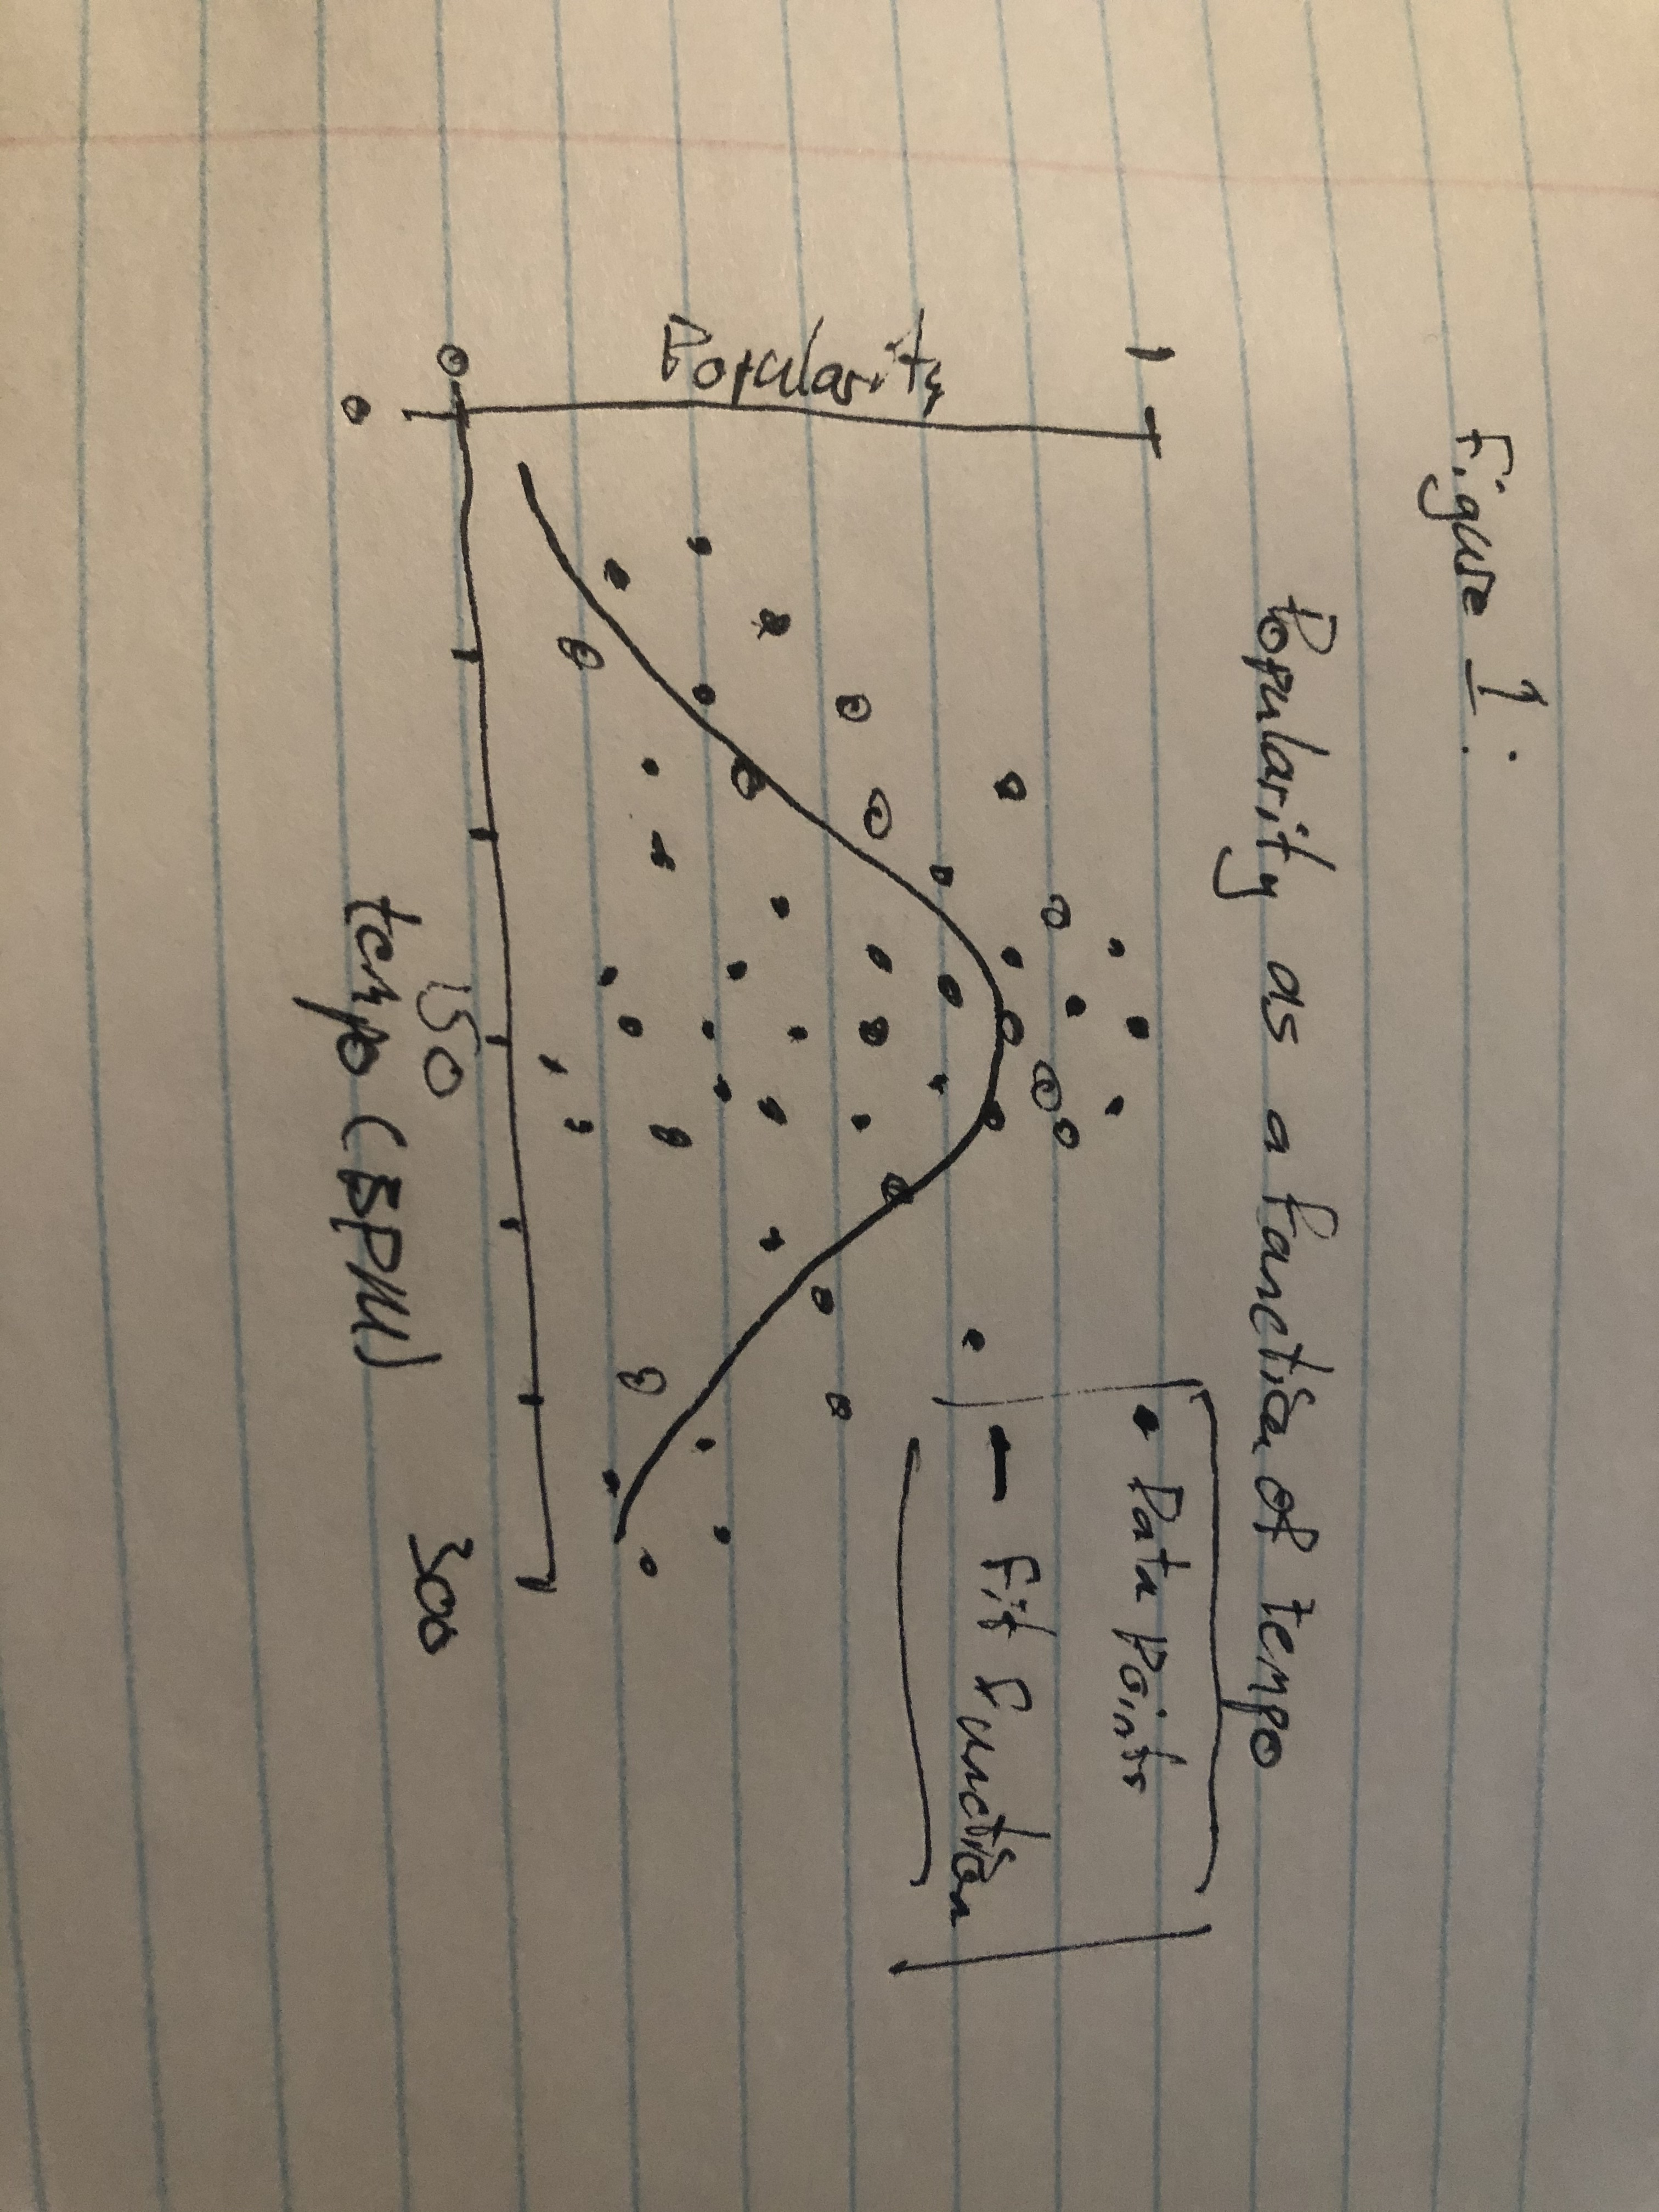
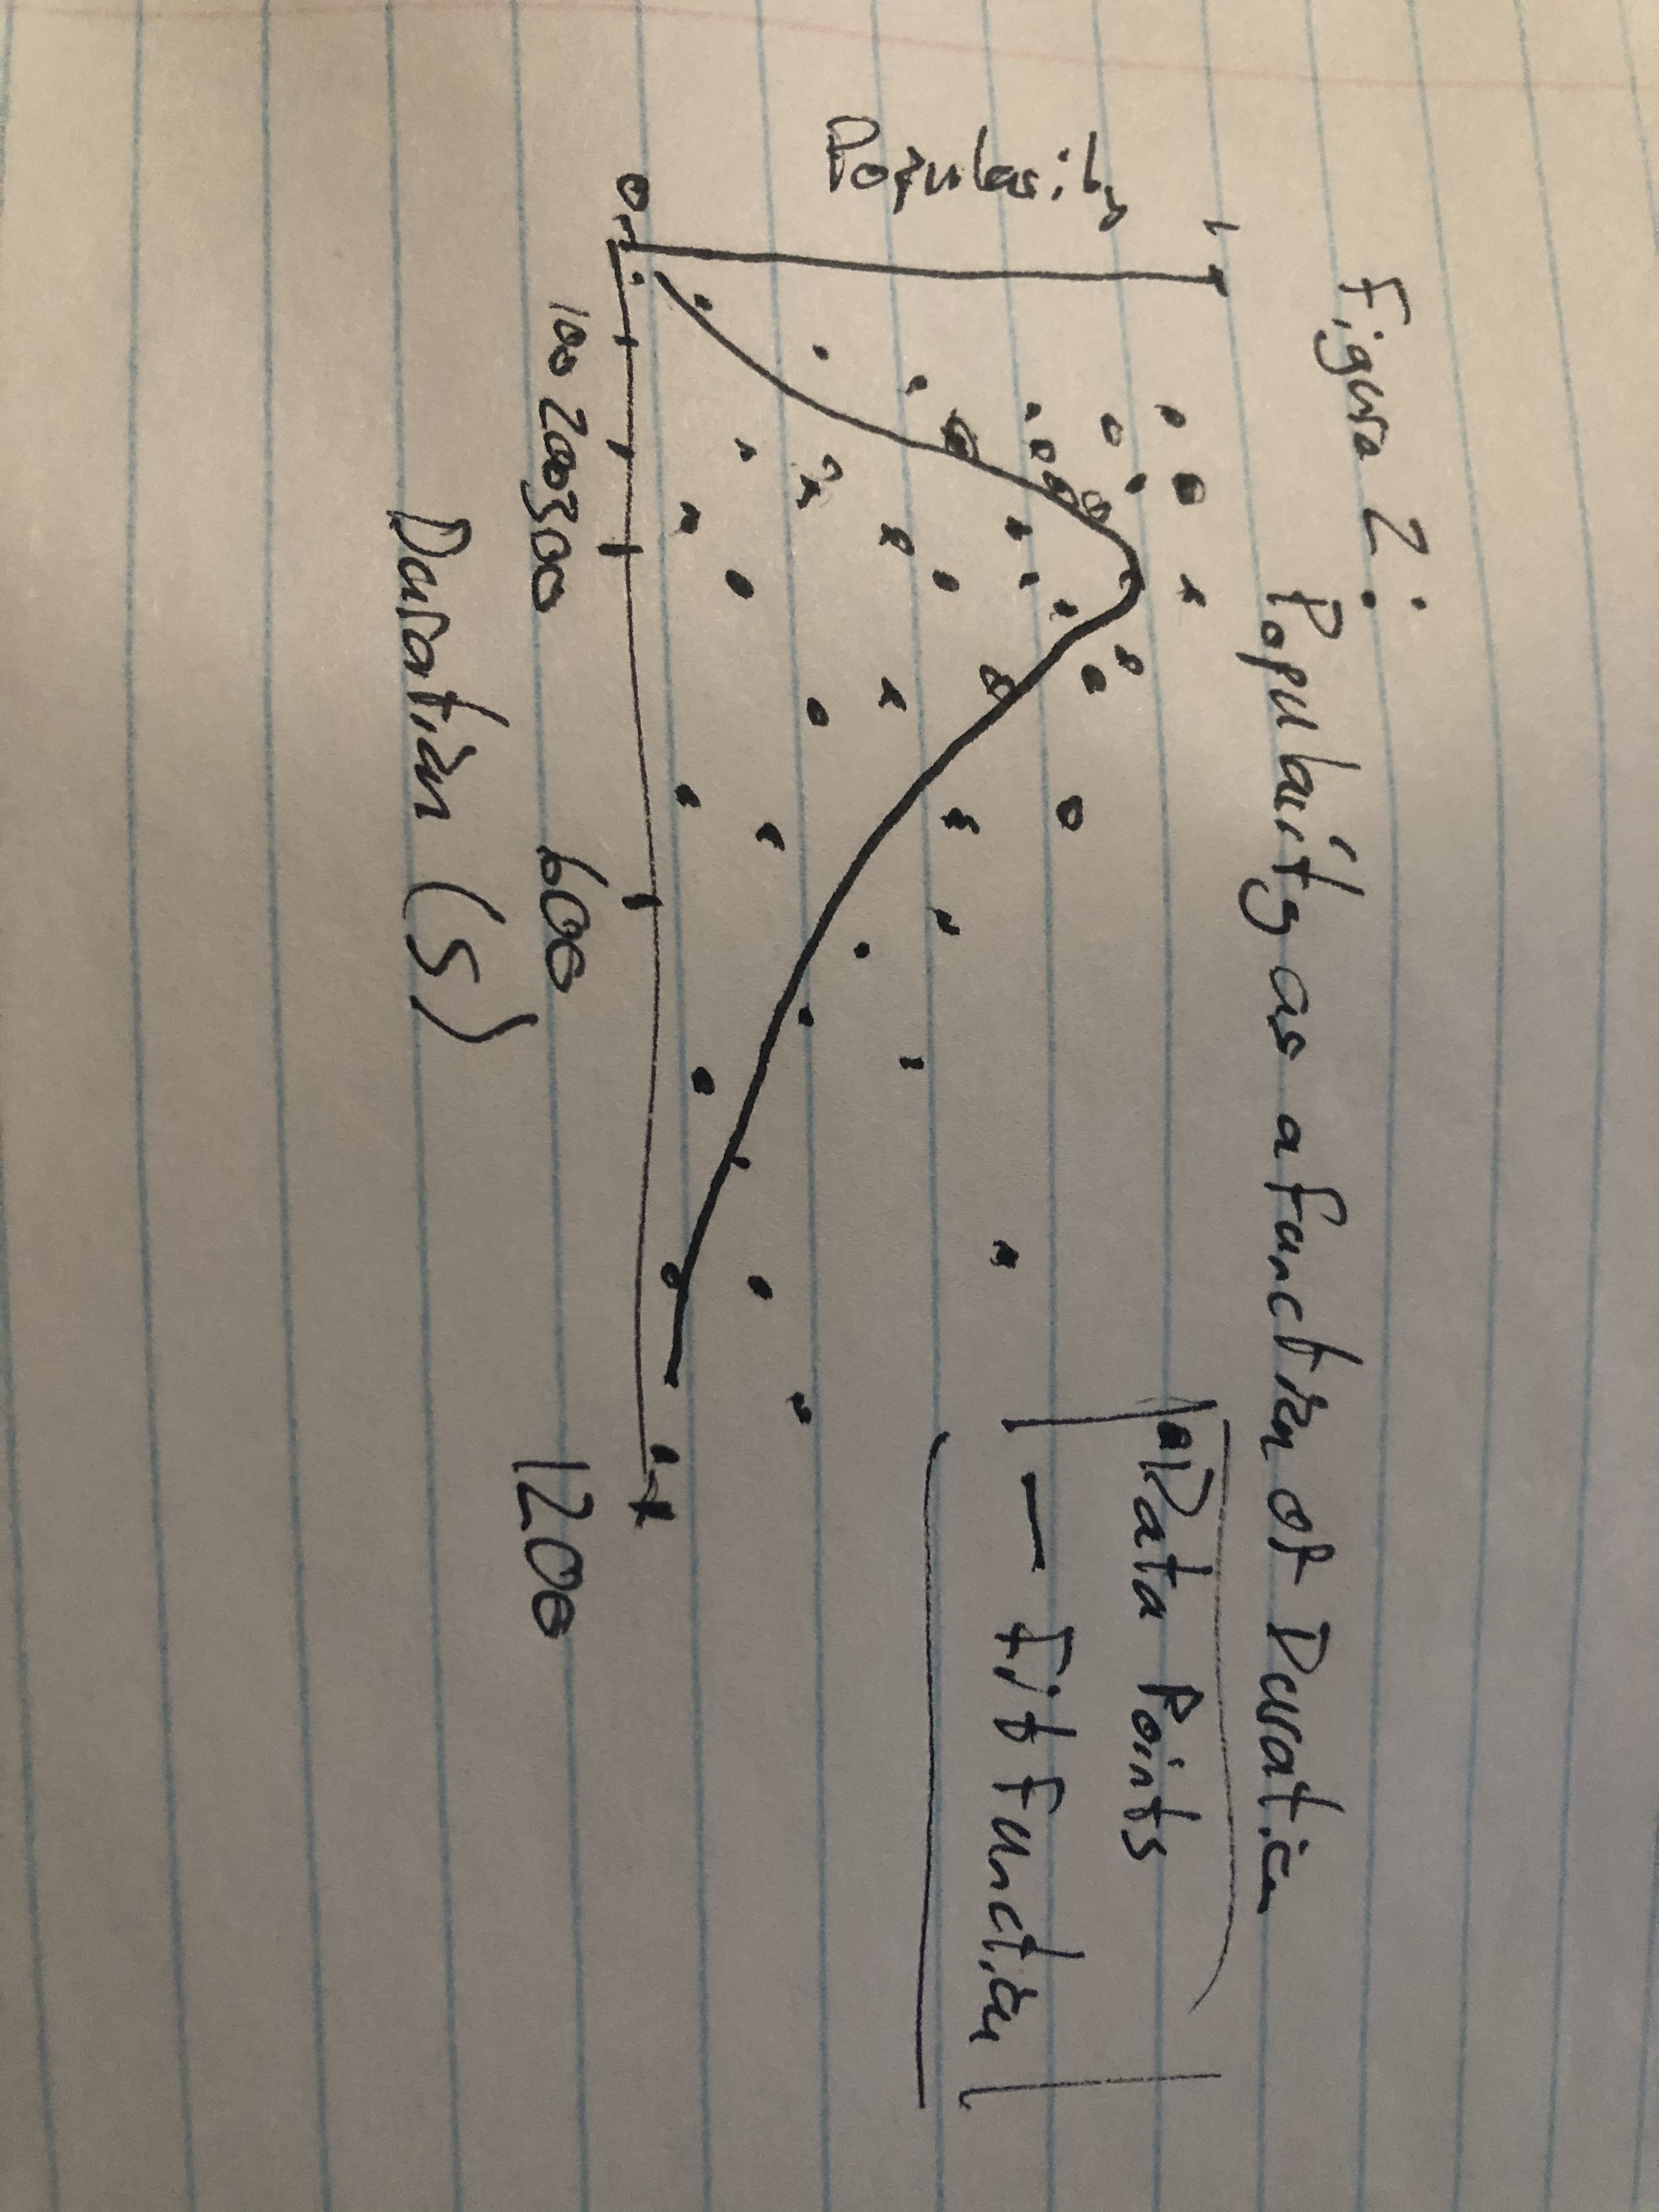

### Step 2a: Building


I will use data from songs_starts_with_a, specifically from columns labelled popularity, duration and bpm.
this is crucial because I am modelling the functional form of how popularity of a song depends on its duration and tempo. I will create 4 plots, all with popularity on the y axis: all data bpm, all data duration, and a fit function for both using the top 50 songs.

In [2]:
from cs103 import *
from typing import NamedTuple, List, Optional
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as fit

##################
# Data Definitions


Song = NamedTuple('Song', [('popularity', float),  #float in range[0,1]
                           ('duration', float),   #float in range[0,...)
                           ('bpm', float)])  #float in range[0,...)

# interp. a song's popularity, bpm and duration in seconds
#examples
S1 = Song(0.412, 127.23454, 50.124)
S2 = Song(0.229, 800.46523, 127.747)


#Template based on Compound (3 fields)
@typecheck
def fn_for_address(s: Song) -> ...:
    return ...(s.popularity,  # float in range[0,1] 
               s.duration, # float in range [0,...)
               s.bpm)    # float in range[0,...)


# List[Song]
# interp. a list of Songs

LOS0 = []

@typecheck
def fn_for_los(los: List[Song]) -> ...:
    
    vals = []
    
    for i in los:
        vals = ...(LOS0, i)
        
    return ...(vals) # template based on arbitrry sized data



    


###2c: analysis and helper functions

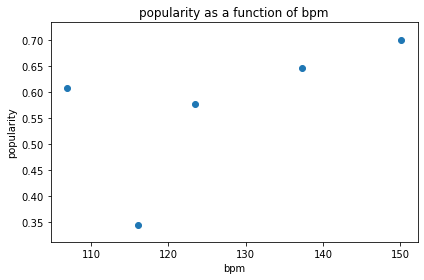

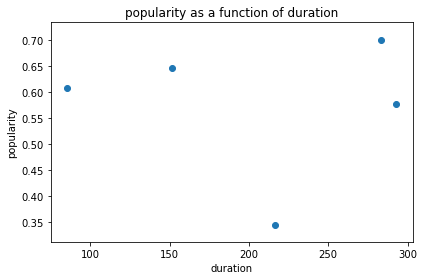

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


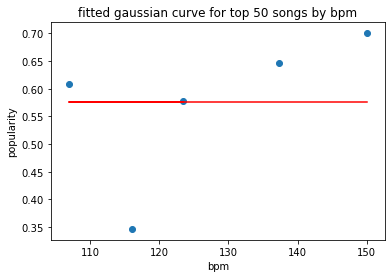

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


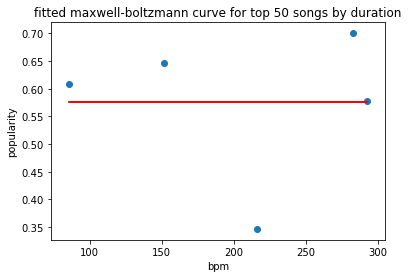

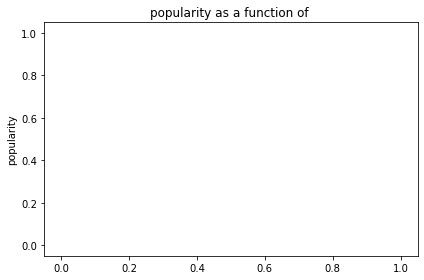

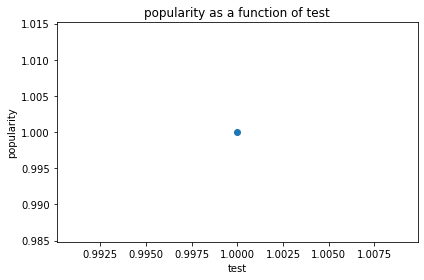

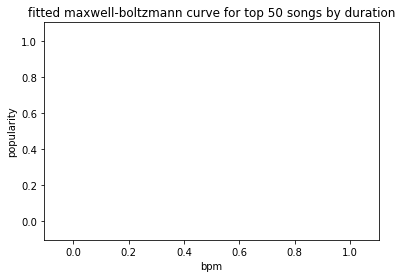

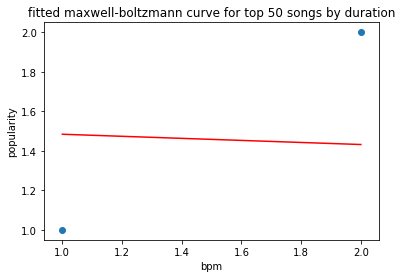

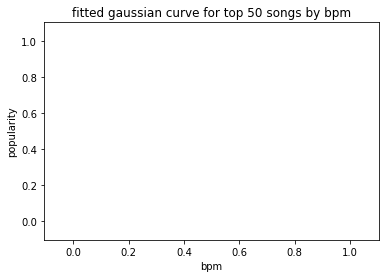

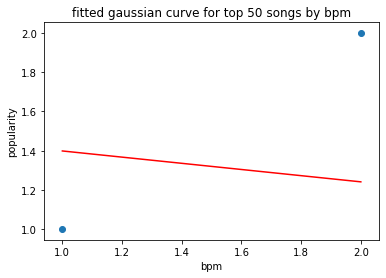

21 of 21 tests passed


In [28]:

###########
# Functions

@typecheck
def main(file: str) -> None:
    """
    takes song data from file, creates two scatter plots of popularity vs bpm and of popularity vs duration,
    from the 50 most popular songs creates a best fit line using scipy.optimize.curve_fit for popularity vs bpm
    assuming a gaussian normal distribution and one for popularity vs duration assuming a maxwell-boltzmann distribution
    """
    
    # Template from HtDAP, based on function composition
    
    #reads the necessary information in file into List(Song)
    data = read(file) 
    
    #creates scatter plot of popularity vs bpm
    scatter_plot(bpm_plot_helper(data)[0],bpm_plot_helper(data)[1],'bpm')
    
    #scatter plot of popularity vs duration
    scatter_plot(duration_plot_helper(data)[0],duration_plot_helper(data)[1],'duration') 
    
    #takes top 50 most popular songs
    top50 = top_50(data) 
    
    #unpacks x and y data for fitting/plotting
    xs,ys = bpm_plot_helper(top50)[0],bpm_plot_helper(top50)[1] 
    
    #plots gaussian best fit line for popularity vs bpm
    line_plot_gauss(xs,ys,gaussian_fitter(xs,ys))  
    
    #unpacks x and y data for fitting/plotting
    xs,ys = duration_plot_helper(top50)[0],duration_plot_helper(top50)[1] 
    
    #plots maxwell-boltzmann best fit line for popularity vs duration
    line_plot_boltzmann(xs,ys,boltzmann_fitter(xs,ys)) 
    return None
    
    
@typecheck
def type_check(x: str) -> float:
    """
    designed to check whether input x (popularity) is both a number (not nan) and greater than zero.
    designed for helping read() to filter out songs which do not have valid popularity information.
    returns 0 if x is nan or 0, returns x as a float if x is a valid number.
    """
    #return 0.  #stub
    # Template from HtDAP
    
    x = float(x)
    if x > 0.:
        return x
    else:
        return 0.

@typecheck
def bpm_plot_helper(los: List[Song]) -> list:
    """
    takes los and returns information on popularity and duration in a list of 2 lists, 
    designed for helping scatter_plot. Popularity is ys, bpm is xs
    """
    #return [] # stub
    #template from List[Song]
    
    #create lists of the data to be plotted
    xs = []
    ys = []
    for song in los:
        ys.append(song.popularity)
        xs.append(song.bpm)
    return [xs,ys]

@typecheck
def duration_plot_helper(los: List[Song]) -> list:
    """
    takes los and returns information on popularity and duration in a list of 2 lists, 
    designed for helping scatter_plot. popularity is ys duration is xs
    """
    #return [] # stub
    #template from List[Song]
    
    #create lists of the data to be plotted
    xs = []
    ys = []
    for song in los:
        ys.append(song.popularity)
        xs.append(song.duration)
    return [xs,ys]

@typecheck
def gaussian_fitter(xs: List[float],ys: List[float]) -> list:
    """
    uses scipy.optimize.curve_fit to find the optimal parameters for gauss(xs,ys,parameters) to
    fit ys as a functoin of xs, using the least squares method. returns the parameters a,sigma,amp,y_int 
    in a list
    """
    #return []  #stub
    # Template from HtDAP
    
    
    #popt is tuple of parameters, maxfev increased for convergence
    popt,pcov = fit(gauss,xs,ys,maxfev = 1000000)
    
    #turn tuple to list type: list[float]
    params = [] 
    for param in popt:
        params.append(param)
        
    return params

@typecheck
def boltzmann_fitter(xs: List[float],ys: List[float]) -> list:
    """
    uses scipy.optimize.curve_fit to find the optimal parameters for boltzmann(xs,ys,parameters) to
    fit ys as a functoin of xs, using the least squares method. returns the parameters a,amp,y_int in a list
    """
    #return []  #stub
    # Template from HtDAP
    
    #popt is tuple of parameters, maxfev increased for convergence
    popt,pcov = fit(boltzmann,xs,ys,maxfev = 1000000)
    
    #turn tuple to list type: list[float]
    params = []
    for param in popt:
        params.append(param)
           
    return params

@typecheck
def scatter_plot(xs: list,ys: list,s: str) -> None:
    """
    plots a scatter plot of popularity as a function of either bpm 
    or duration, specified by s. xs is either the bpm or duration of the given songs, ys is the popularity.
    returns None.
    """
    #return None  #stub
    # Template based on visualization
    
    #create the scatter plot
    plt.scatter(xs,ys)
    
    #set the title and axis labels
    plt.title('popularity as a function of {}'.format(s))
    plt.ylabel('popularity')
    plt.xlabel(s)
    
    #show it
    plt.show()
    
    return None

def line_plot_gauss(xs: List[float],ys: List[float],params: tuple) -> None:
    """
    plots a gaussian curve for the popularity of given songs as a function of duration,
    over a scatter plot of the data used to find the fit. designed to take parameters for the fit from 
    boltzmann_fitter. returns None.
    """
    #return None  #stub
    # Template based on visualization
    
    #gets y values for the fit function from gauss and gaussian_fitter
    fitfunc = gauss(xs,params[0],params[1],params[2],params[3])
    
    #plots the best fit line
    plt.plot(xs,fitfunc,color='red')

    #plots a scatter plot of the top 50 songs used to find the best fit function
    plt.scatter(xs,ys)
    
    #set axis labels and title
    plt.xlabel('bpm')
    plt.ylabel('popularity')
    plt.title('fitted gaussian curve for top 50 songs by bpm')
    
    #muestrame
    plt.show()
    return None

def line_plot_boltzmann(xs: List[float],ys: List[float],params: tuple) -> None:
    """
    plots a maxwell-boltzmann curve for the popularity of given songs as a function of duration,
    over a scatter plot of the data used to find the fit. designed to take parameters for the fit from 
    boltzmann_fitter. returns None.
    """
    #return None  #stub
    # Template based on visualization
    
    #gets y vals for fit function from boltzmann and boltzmann_fitter
    fitfunc = boltzmann(xs,params[0],params[1],params[2])
    
    #plots the bet fit line
    plt.plot(xs,fitfunc,color='red')
    
    #plots a scatter plot of the data used to find best fit line
    plt.scatter(xs,ys)
    
    #set the axis labels and title
    plt.xlabel('bpm')
    plt.ylabel('popularity')
    plt.title('fitted maxwell-boltzmann curve for top 50 songs by duration')
    
    
    #yeh baby lemme see dem plots
    plt.show()
    return None


@typecheck
def read(filename: str) -> List[Song]:
    """    
    reads information from a file with song information, picks out data on the song's popularity, 
    bpm and duration if the popularity of the song is not a nan or 0, compiles this into a Song 
    and returns list of Songs
    """
    #return []  #stub
    # Template from HtDAP
    # los contains the result so far
    los = [] # type: List[Song]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            if type_check(row[3]) > 0.: # check popularity is not 0 or nan
                s = Song(type_check(row[3]), float(row[4]), float(row[5]))
                los.append(s)

    
    return los

def boltzmann(xs: list,a: float, amp: float, y_int: float) -> list:
    """
    function returns a maxwell-boltzmann distribution as a list of y values from independant variable xs and
    parameters a (mean), amp (amplitude multiplier), and y_int (constant) designed for
    helping scipy.optimize.curve_fit.
    """
    #return [] # stub
    # Template from HtDAP
    
    #equation for maxwell-boltzmann distribution with amplitude and verticle translation parameters
    ys = amp*np.sqrt(2/(np.pi))*np.square(xs)*np.e**((-np.square(xs))/(2*a**2))/(a**3) + y_int
    return list(ys)

def gauss(xs:list, a: float, sigma: float, amp: float, y_int: float) -> list:
    """
    function returns a gaussian distribution as a list of y values from independant variable xs and
    parameters a (mean), sigma (standard deviation), and y_int (y-intercept) designed for input in
    scipy.optimize.curve_fit. 
    """
    #return [] # stub
    # Template from HtDAP
    
    #subtract a from each value in xs because python can't do lists
    xs = [x - a for x in xs]
    
    #equation for gaussian normal distribution with added parameters for amplitude and verticle translation
    ys = amp*(2*np.pi*sigma**2)**(-1/2)*np.e**((-np.square(xs))/(2*sigma**2)) + y_int
    
    return list(ys)

def top_50(los: List[Song]) -> List[Song]:
    """
    takes the 50 most popular songs from a list of songs by sorting the list
    in order of decreasing popularity and taking the first 50 elements

    """
    #return [] # stub
    # Template from List[Song]
    
    #sort los by popularity in reverse order
    los = sorted(los, key=lambda s:s.popularity, reverse = True)
    
    #take the top 50
    los = los[:50]
    
    return los
    
    


# Begin testing
start_testing()

# test for main
expect(main('songs_test2.csv'), None)
#expect(main('songs_test1.csv'), None) #does not work because the data file is too small.
#curve_fit requires more data points than parameters to make a fit. this is not an issue with my program,
#just that trying to fit a curve with 4 parameters to two data points is impractical and not allowed by scipy

# Examples and tests for read
expect(read('songs_test1.csv'), [Song(0.355285536,152.97261,140.703), Song(0.496175336,179.93098,149.066)])
expect(read('songs_test2.csv'), [Song(0.577499802,292.75383,123.38), Song(0.607714202,85.44608,106.934), 
                                 Song(0.701123772,283.19302,150.05), Song(0.646854148,151.40526,137.274),
                                 Song(0.345802234,216.24118,116.03)])

# Examples and tests for type_check
expect(type_check('3'),3.)
expect(type_check('0'), 0.)
expect(type_check('nan'), 0.)

#Examples and tests for bpm_plot_helper
expect(bpm_plot_helper(read('songs_test1.csv')), [[140.703,149.066],[0.355285536,0.496175336]])
expect(bpm_plot_helper(read('songs_test2.csv')), [[123.38,106.934,150.05,137.274,116.03],[0.577499802,0.607714202,
                                                                                         0.701123772,0.646854148,
                                                                                         0.345802234]])
#Examples and tests for duration_plot_helper
expect(duration_plot_helper(read('songs_test1.csv')), [[152.97261,179.93098],[0.355285536,0.496175336]])
expect(duration_plot_helper(read('songs_test2.csv')), [[292.75383,85.44608,283.19302,151.40526,216.24118],
                                                       [0.577499802,0.607714202,0.701123772,0.646854148,
                                                        0.345802234]])


#Examples and tests for boltzmann
expect(boltzmann([0.,1.,2.],1.,1.,1.),[1.,1.4839414490382867,1.4319277321055046])

#Examples and tests for gauss
expect(gauss([0,1,2],1,1,1,1),[1.2419707245191434, 1.3989422804014326, 1.2419707245191434])

#Examples and tests for gaussian_fitter
expect(gaussian_fitter([0,1,2,3,4],[1.2419707245191434, 1.3989422804014326, 1.2419707245191434,
                                    1.0539909665131881, 1.004431848411938]), [1.,1.,1.,1.])                                                                              

#Example and tests for boltzmann_fitter
expect(boltzmann_fitter([0,1,2,3],[1.0, 1.4839414490382867, 1.4319277321055046, 1.0797732714148842]), [1.,1.,1.]) 
                                                                                                           
#Examples and test for top_50 (just tests the order to avoid having to run through the entire data file in testing
expect(top_50(read('songs_test2.csv')), [Song(popularity=0.701123772, duration=283.19302, bpm=150.05),
                                         Song(popularity=0.646854148, duration=151.40526, bpm=137.274),
                                         Song(popularity=0.607714202, duration=85.44608, bpm=106.934),
                                         Song(popularity=0.577499802, duration=292.75383, bpm=123.38),
                                         Song(popularity=0.345802234, duration=216.24118, bpm=116.03)])                                                                                                           



#tests for scatter_plot
expect(scatter_plot([],[],''), None )
expect(scatter_plot([1],[1],'test'), None)

#tests for line_plot_boltzman
expect(line_plot_boltzmann([],[],[0,0,0]), None)
expect(line_plot_boltzmann([1,2],[1,2],[1,1,1]), None)

#tests for line_plot_gauss
expect(line_plot_gauss([],[],[1,1,1,1]), None)
expect(line_plot_gauss([1,2],[1,2],[1,1,1,1]), None)

# show testing summary
summary()

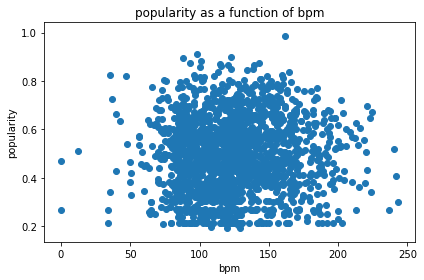

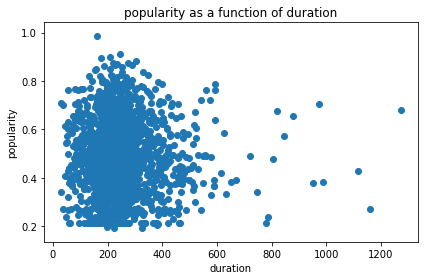

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


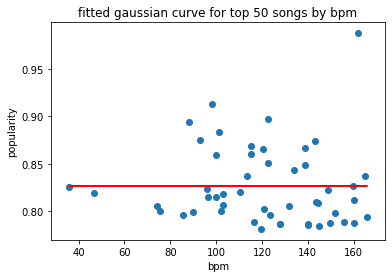

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


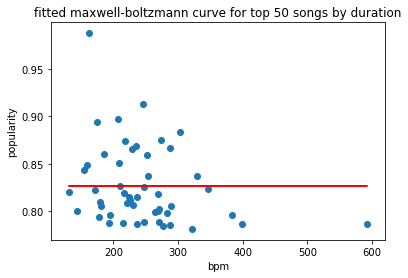

the fit functions did not work unfortunately, the data was too variable to get a decent fit but given some nicer data im sure they would work


In [25]:
# call to main using songs_starts_with_a.csv

main('songs-starts-with-a.csv')

print('the fit functions did not work unfortunately, the data was too variable to get a decent fit but given some nicer data im sure they would work')


Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), options=('project_milestone_template.ipynb', 'project_final_su…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

[NbConvertApp] Converting notebook final_project.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] ERROR | Error while converting 'final_project.ipynb'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 410, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 179, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 197, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/html.py", line 95, in from_notebook_node
    return super(HTMLExporter, self).from_notebook_node(nb, resources, **kw)
  File "/opt/conda/